# 0.1. Import Libraries and Data

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Naming Path for file retrieval 
path = r'C:\Users\ruthf\OneDrive\Documents\Data Immersion\Achievement 4\07-2022 Instacart Basket Analysis'

In [3]:
# Import orders_products_merged pkl
ords_prods_merge = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_merged_user_flags.pkl'))

In [4]:
ords_prods_merge.shape

(32404859, 24)

In [5]:
ords_prods_merge.head(10)

order_id  user_id  order_number  order_day_of_week  order_hour_of_day  \
0   2539329        1             1                  2                  8   
1   2398795        1             2                  3                  7   
2    473747        1             3                  3                 12   
3   2254736        1             4                  4                  7   
4    431534        1             5                  4                 15   
5   3367565        1             6                  2                  7   
6    550135        1             7                  1                  9   
7   3108588        1             8                  1                 14   
8   2295261        1             9                  1                 16   
9   2550362        1            10                  4                  8   

   days_since_previous_order  product_id  add_to_cart_order  reordered _merge  \
0                        NaN         196                  1          0   both   
1                       15.0         196                  1          1   both   
2                       21.0         196                  1          1   both   
3                       29.0         196                  1          1   both   
4                       28.0         196                  1          1   both   
5                       19.0         196                  1          1   both   
6                       20.0         196                  1          1   both   
7                       14.0         196                  2          1   both   
8                        0.0         196                  4          1   both   
9                       30.0         196                  1          1   both   

   ...    price_range_loc     Busiest day         Busiest days  \
0  ...  Mid-range product  Regularly busy  Regularly busy days   
1  ...  Mid-range product  Regularly busy      Least busy days   
2  ...  Mid-range product  Regularly busy      Least busy days   
3  ...  Mid-range product      Least busy      Least busy days   
4  ...  Mid-range product      Least busy      Least busy days   
5  ...  Mid-range product  Regularly busy  Regularly busy days   
6  ...  Mid-range product  Regularly busy         Busiest days   
7  ...  Mid-range product  Regularly busy         Busiest days   
8  ...  Mid-range product  Regularly busy         Busiest days   
9  ...  Mid-range product      Least busy      Least busy days   

   Busiest_period_of_day max_order  loyalty_flag mean_price spending_flag  \
0         Average orders        10  New customer   6.367797   Low spender   
1         Average orders        10  New customer   6.367797   Low spender   
2            Most orders        10  New customer   6.367797   Low spender   
3         Average orders        10  New customer   6.367797   Low spender   
4            Most orders        10  New customer   6.367797   Low spender   
5         Average orders        10  New customer   6.367797   Low spender   
6            Most orders        10  New customer   6.367797   Low spender   
7            Most orders        10  New customer   6.367797   Low spender   
8            Most orders        10  New customer   6.367797   Low spender   
9         Average orders        10  New customer   6.367797   Low spender   

   median_days_since_previous_order         Frequency_flag  
0                              20.5  Non-frequent customer  
1                              20.5  Non-frequent customer  
2                              20.5  Non-frequent customer  
3                              20.5  Non-frequent customer  
4                              20.5  Non-frequent customer  
5                              20.5  Non-frequent customer  
6                              20.5  Non-frequent customer  
7                              20.5  Non-frequent customer  
8                              20.5  Non-frequent customer  
9                              20.5  Non-frequent customer  

[10 rows x 24 columns]

<AxesSubplot:>

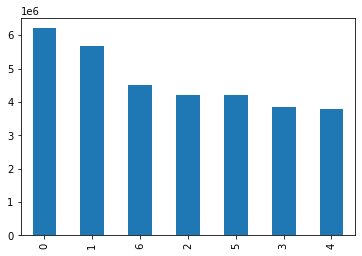

In [9]:
# Create a bar chart.  Automatically sorts from largest to smallest based on count
ords_prods_merge['order_day_of_week'].value_counts().plot.bar()

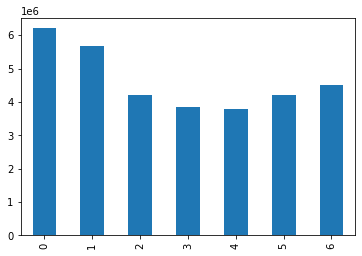

In [10]:
# To sort on index (0-6)
bar = ords_prods_merge['order_day_of_week'].value_counts().sort_index().plot.bar()

In [ ]:
# Can also use sort_index() on frequency table

In [11]:
ords_prods_merge['order_day_of_week'].value_counts()

0    6204182
1    5660230
6    4496490
2    4213830
5    4205791
3    3840534
4    3783802
Name: order_day_of_week, dtype: int64

In [12]:
ords_prods_merge['order_day_of_week'].value_counts().sort_index()

0    6204182
1    5660230
2    4213830
3    3840534
4    3783802
5    4205791
6    4496490
Name: order_day_of_week, dtype: int64

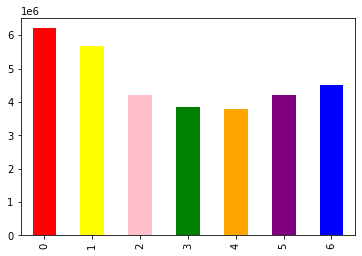

In [17]:
# Adding colour
bar_colour = ords_prods_merge['order_day_of_week'].value_counts().sort_index().plot.bar(color =['red','yellow','pink','green','orange','purple','blue'])

In [19]:
# Exporting bar chart to folder as image
bar_colour.figure.savefig(os.path.join(path, '04 Analysis','Visualisations', 'bar_orders_dow.png'))

<AxesSubplot:ylabel='Frequency'>

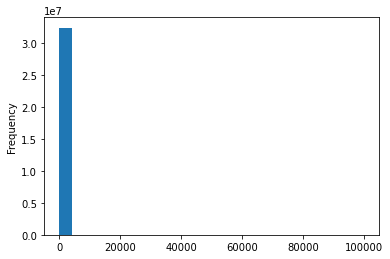

In [20]:
# Creating a histogram on the prices column
ords_prods_merge['prices'].plot.hist(bins = 25)

In [22]:
# Checking descriptive stats to see why histogram is just one bar
ords_prods_merge['prices'].describe()

count    3.240486e+07
mean     1.198023e+01
std      4.956554e+02
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.130000e+01
max      9.999900e+04
Name: prices, dtype: float64

In [30]:
ords_prods_merge['prices'].mean()

11.980225638467232

In [32]:
ords_prods_merge['prices'].max()

99999.0

In [33]:
ords_prods_merge['prices'].min()

1.0

In [34]:
ords_prods_merge['prices'].median()

7.4

In [45]:
ords_prods_merge['prices'].mode()

0    12.3
Name: prices, dtype: float64

In [ ]:
# Can you see multiple stats together as in cell 22?


<AxesSubplot:xlabel='prices', ylabel='prices'>

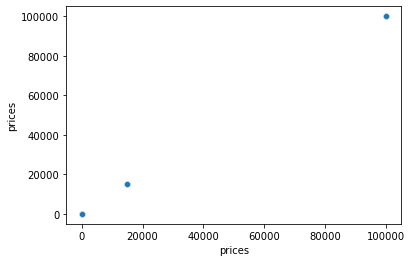

In [35]:
# Using scatterplot to identify outliers

sns.scatterplot(x = 'prices', y = 'prices',data = ords_prods_merge)

In [ ]:
# Outliers identified with prices near 20,000 and 100,000

In [37]:
pd.options.display.max_columns = None

In [38]:
# Finding values with price higher than 100
ords_prods_merge.loc[ords_prods_merge['prices'] > 100]

order_id  user_id  order_number  order_day_of_week  \
10030345    912404       17            12                  2   
10030346    603376       17            22                  6   
10030347   3264360      135             2                  2   
10030348    892534      135             3                  0   
10030349    229704      342             8                  1   
...            ...      ...           ...                ...   
29166209   2249946   204099            29                  0   
29166210   2363282   204099            31                  0   
29166211   3181945   204395            13                  3   
29166212   2486215   205227             7                  3   
29166213   2232716   205227            10                  0   

          order_hour_of_day  days_since_previous_order  product_id  \
10030345                 14                        5.0       21553   
10030346                 16                        4.0       21553   
10030347                 21                       13.0       21553   
10030348                  8                       12.0       21553   
10030349                 19                       30.0       21553   
...                     ...                        ...         ...   
29166209                  8                        4.0       33664   
29166210                  9                        2.0       33664   
29166211                 15                        8.0       33664   
29166212                 20                        4.0       33664   
29166213                 11                        4.0       33664   

          add_to_cart_order  reordered _merge  \
10030345                  5          0   both   
10030346                  3          1   both   
10030347                  6          0   both   
10030348                  3          1   both   
10030349                  9          0   both   
...                     ...        ...    ...   
29166209                  1          0   both   
29166210                  1          1   both   
29166211                 25          0   both   
29166212                  8          0   both   
29166213                 23          1   both   

                              product_name  aisle_id  department_id   prices  \
10030345  Lowfat 2% Milkfat Cottage Cheese       108             16  14900.0   
10030346  Lowfat 2% Milkfat Cottage Cheese       108             16  14900.0   
10030347  Lowfat 2% Milkfat Cottage Cheese       108             16  14900.0   
10030348  Lowfat 2% Milkfat Cottage Cheese       108             16  14900.0   
10030349  Lowfat 2% Milkfat Cottage Cheese       108             16  14900.0   
...                                    ...       ...            ...      ...   
29166209             2 % Reduced Fat  Milk        84             16  99999.0   
29166210             2 % Reduced Fat  Milk        84             16  99999.0   
29166211             2 % Reduced Fat  Milk        84             16  99999.0   
29166212             2 % Reduced Fat  Milk        84             16  99999.0   
29166213             2 % Reduced Fat  Milk        84             16  99999.0   

             price_range_loc     Busiest day         Busiest days  \
10030345  High-range product  Regularly busy  Regularly busy days   
10030346  High-range product  Regularly busy  Regularly busy days   
10030347  High-range product  Regularly busy  Regularly busy days   
10030348  High-range product     Busiest day         Busiest days   
10030349  High-range product  Regularly busy         Busiest days   
...                      ...             ...                  ...   
29166209  High-range product     Busiest day         Busiest days   
29166210  High-range product     Busiest day         Busiest days   
29166211  High-range product  Regularly busy      Least busy days   
29166212  High-range product  Regularly busy      Least busy days   
29166213  High-range product     Busiest day         Busiest days   

         Busiest_peri

In [39]:
# Can you do group by product id where price is >100

In [40]:
# Assigning nan (missing value) to any prices over 100.
ords_prods_merge.loc[ords_prods_merge['prices']>100,'prices'] = np.nan

In [42]:
# Checking new prices max
ords_prods_merge['prices'].max()

25.0

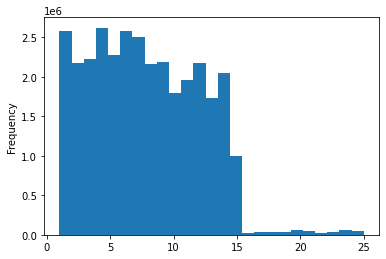

In [44]:
# Creating histogram on clean data
hist = ords_prods_merge['prices'].plot.hist(bins = 25)

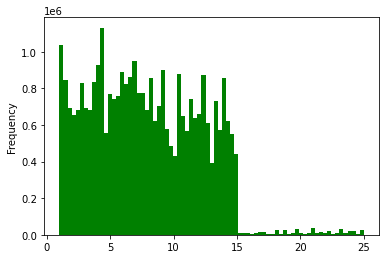

In [47]:
# Histogram with more bins & diff colour
hist_2 = ords_prods_merge['prices'].plot.hist(bins = 75, color = 'green')

In [48]:
# Exporting histograms to folder as images
hist.figure.savefig(os.path.join(path, '04 Analysis','Visualisations', 'hist_25bins.png'))
hist_2.figure.savefig(os.path.join(path, '04 Analysis','Visualisations', 'hist_75bins.png'))

In [ ]:
# could I use a line chart to track number of orders over day of the week?

In [60]:
# Create a list holding true/false values to test np.random.rand() <=0.7
np.random.seed(4)
dev = np.random.rand(len(ords_prods_merge)) <= 0.7

In [50]:
# dev is the boolean list of true/false
dev

array([False,  True, False, ...,  True,  True,  True])

In [61]:
# Store 70% of the sample in data frame big
big = ords_prods_merge[dev]

In [62]:
# Store 30% of the sample in data frame small
small = ords_prods_merge[~dev]

In [63]:
len(ords_prods_merge)

32404859

In [64]:
# Checking length is correct
len(big)+len(small)

32404859

In [65]:
len(big)

22683761

In [66]:
# Creating new data frame with just the columns needed for the line chart
df2 = small[['order_day_of_week','prices']]

In [67]:
df2

order_day_of_week  prices
0                         2     9.0
2                         3     9.0
3                         4     9.0
6                         1     9.0
10                        1     9.0
...                     ...     ...
32404841                  1     8.8
32404842                  2     8.8
32404843                  0     3.7
32404849                  3     3.7
32404850                  4     3.7

[9721098 rows x 2 columns]

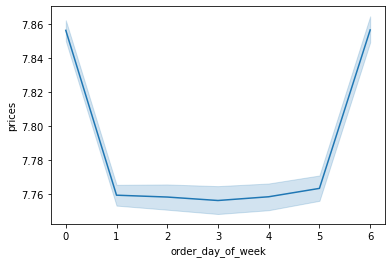

In [68]:
line = sns.lineplot(data = df2, x = 'order_day_of_week',y = 'prices')